In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
path = 'Entrega_Final_Procesamiento_DanielTapia_LuisZanabria_NorbertoPena_HaroldVasquez/datasets/bike_buyers.csv'
df = pd.read_csv(path)
df_copy = df.copy()

In [3]:
df_copy.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes


# Limpieza de los datos

Vamos a limpiar nuestro dataset para seleccionar nuestras variables independientes X y nuestra variable dependiente y, además de procesar los datos para transformar valores categóricos a su representación númerica

Revisaremos primero si podemos sustituir valores nulos de algunas columnas para no remover filas de nuestro dataset

In [4]:
df_copy.isna().sum()

ID                   0
Marital Status       7
Gender              11
Income               6
Children             8
Education            0
Occupation           0
Home Owner           4
Cars                 9
Commute Distance     0
Region               0
Age                  8
Purchased Bike       0
dtype: int64

In [5]:
df_copy.dropna(subset = ['Income','Children','Home Owner', 'Cars','Age','Marital Status'], axis = 0, inplace = True)
df_copy.isna().sum()

ID                   0
Marital Status       0
Gender              10
Income               0
Children             0
Education            0
Occupation           0
Home Owner           0
Cars                 0
Commute Distance     0
Region               0
Age                  0
Purchased Bike       0
dtype: int64

In [6]:
pd.unique(df_copy['Gender'])

array(['Female', 'Male', nan], dtype=object)

In [7]:
df_copy['Gender'].replace(np.nan, 'Other', inplace=True)

In [8]:
pd.unique(df_copy['Gender'])

array(['Female', 'Male', 'Other'], dtype=object)

In [9]:
df_copy.isna().sum()

ID                  0
Marital Status      0
Gender              0
Income              0
Children            0
Education           0
Occupation          0
Home Owner          0
Cars                0
Commute Distance    0
Region              0
Age                 0
Purchased Bike      0
dtype: int64

In [10]:
df_copy.reset_index(drop = True, inplace = True)

# Transformación de los datos

Vamos a obtener la representación númerica de las variables categóricas del conjunto de datos

In [11]:
df_copy['Purchased Bike'] = df_copy['Purchased Bike'].map({'Yes':1, 'No':0})
#df_copy['Marital Status'] = df_copy['Marital Status'].map({'Married':1, 'Single':0})
#df_copy['Home Owner'] = df_copy['Home Owner'].map({'Yes':1, 'No':0})

df_copy = df_copy.drop(['ID'], axis = 1)

In [12]:
df_copy.head()

,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,0
1,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,0
2,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,0
3,Single,Other,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,1
4,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,1


## Obtención de de dummies para variables categóricas

In [13]:
X_list = ['Marital Status', 'Gender','Income', 'Region','Home Owner', 'Cars','Age'] #Lista para seleccionar los atributos para el modelo
X_list_excluded = df_copy.columns.difference(X_list) #Lista con los atributos que NO se usaran
categorical_list = ['Marital Status', 'Gender','Home Owner', 'Region'] #Lista con los atributos de los que obtendremos los dummies

In [14]:
df_list = []
for categorical in categorical_list:
    df_list.append(pd.get_dummies(df_copy[categorical], drop_first=True))

In [15]:
for dataframe in df_list:
    df_copy = pd.concat([df_copy, dataframe], axis = 1)
    
df_copy.head()

,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike,Single,Male,Other,Yes,North America,Pacific
0,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,0,0,0,0,1,0,0
1,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,0,0,1,0,1,0,0
2,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,0,0,1,0,0,0,0
3,Single,Other,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,1,1,0,1,1,0,1
4,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,1,1,1,0,0,0,0


In [16]:
df_copy = df_copy.drop(categorical_list, axis = 1)

In [17]:
df_copy.head()

,Income,Children,Education,Occupation,Cars,Commute Distance,Age,Purchased Bike,Single,Male,Other,Yes,North America,Pacific
0,40000.0,1.0,Bachelors,Skilled Manual,0.0,0-1 Miles,42.0,0,0,0,0,1,0,0
1,30000.0,3.0,Partial College,Clerical,1.0,0-1 Miles,43.0,0,0,1,0,1,0,0
2,80000.0,5.0,Partial College,Professional,2.0,2-5 Miles,60.0,0,0,1,0,0,0,0
3,70000.0,0.0,Bachelors,Professional,1.0,5-10 Miles,41.0,1,1,0,1,1,0,1
4,30000.0,0.0,Bachelors,Clerical,0.0,0-1 Miles,36.0,1,1,1,0,0,0,0


# Selección de atributos y modelo logístico

In [18]:
X = np.asarray(df_copy.drop(X_list_excluded, axis = 1))
y = np.asarray(df_copy['Purchased Bike'].astype('int'))

Normalizaremos el conjunto de datos

In [19]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.52247698, -1.31080576, -0.19636846, -0.91426356, -0.9958506 ,
        -0.10249001,  0.67971029, -1.02526714, -0.48468192],
       [-0.84800991, -0.40880637, -0.10842318, -0.91426356,  1.00416668,
        -0.10249001,  0.67971029, -1.02526714, -0.48468192],
       [ 0.77965476,  0.49319301,  1.38664658, -0.91426356,  1.00416668,
        -0.10249001, -1.47121504, -1.02526714, -0.48468192],
       [ 0.45412183, -0.40880637, -0.28431374,  1.0937765 , -0.9958506 ,
         9.75704873,  0.67971029, -1.02526714,  2.06320881],
       [-0.84800991, -1.31080576, -0.72404014,  1.0937765 ,  1.00416668,
        -0.10249001, -1.47121504, -1.02526714, -0.48468192]])

## Entrenamiento/Pruebas del modelo

Dividiremos los datos en un 80% para entrenamiento y el 20% restante para probar el modelo

In [20]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (769, 9) (769,)
Test set: (193, 9) (193,)


Definimos nuestro modelo logístico

In [21]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

Ahora vamos a predecir usando nuestros datos de pruebas

In [22]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1])

**predict_proba** devuelve estimaciones para todas las clases, ordenadas por la etiqueta de las clases. Entonces, la primera columna es la probabilidad de la clase 0, P(Y=0|X), y la segunda columna es la probabilidad de la clase 1, P(Y=1|X):

In [23]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.53080935, 0.46919065],
       [0.54788873, 0.45211127],
       [0.66608032, 0.33391968],
       [0.47095189, 0.52904811],
       [0.56461804, 0.43538196],
       [0.41582345, 0.58417655],
       [0.49183316, 0.50816684],
       [0.64951225, 0.35048775],
       [0.48528655, 0.51471345],
       [0.44224853, 0.55775147],
       [0.44598993, 0.55401007],
       [0.54596455, 0.45403545],
       [0.65460789, 0.34539211],
       [0.49223321, 0.50776679],
       [0.43245515, 0.56754485],
       [0.4130762 , 0.5869238 ],
       [0.44300664, 0.55699336],
       [0.55522083, 0.44477917],
       [0.45956319, 0.54043681],
       [0.456245  , 0.543755  ],
       [0.55121342, 0.44878658],
       [0.40708905, 0.59291095],
       [0.56585812, 0.43414188],
       [0.47822305, 0.52177695],
       [0.44615259, 0.55384741],
       [0.58211523, 0.41788477],
       [0.39849848, 0.60150152],
       [0.52119972, 0.47880028],
       [0.51616386, 0.48383614],
       [0.6225145 , 0.3774855 ],
       [0.

# Evaluación

## Matriz de confusión

Vamos a evaluar nuestro modelo con la matriz de confusión.

In [24]:
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[55 24]
 [44 70]]


In [25]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.74      0.61      0.67       114
           1       0.56      0.70      0.62        79

    accuracy                           0.65       193
   macro avg       0.65      0.66      0.65       193
weighted avg       0.67      0.65      0.65       193



In [26]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.6459360366220858

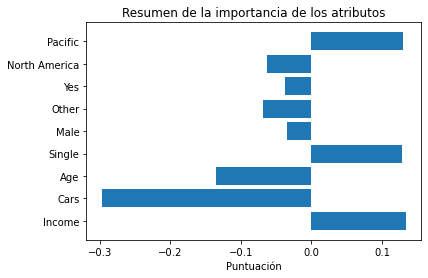

In [27]:
importance = LR.coef_.flatten()
plt.rcParams["figure.figsize"] = (10,10)
plt.barh(df_copy.drop(X_list_excluded, axis = 1).columns, importance)
plt.title('Resumen de la importancia de los atributos')
plt.xlabel('Puntuación')
plt.show()


In [28]:
LR.score(X_test, y_test)

0.6476683937823834